# Analisis Exploratorio - Heart Disease Databases

## Introducción

Este es un analisis exploratorio sobre una muestra el dataset unificado de "Heart Disease Databases"
Dicho dataset comprende 3 bases de datos sobre diganosticos de enfermedades cardiacas en tres diferentes regiones:

1. Cleveland Clinic Foundation (processed.cleveland.data)
2. Hungarian Institute of Cardiology, Budapest (Hungarian_Switzerland.xlsx)
3. V.A. Medical Center, Long Beach, CA (LongBeachData.pdf)

El dataset original tenía 4 regiones ademas de tener 76 características por registros. 
En esta muestra solo se usarán las tres regiones anteriores y solamente 14 de las 76 caracteristicas y una muestra con 797 registros.

Se consiguieron los datasets en diferentes formatos, los cuales ya fueron procesados y unificados en un unico dataset en formato parquet [enfermedad_cardiaca_encoded.parquet](DataFiles/enfermedad_cardiaca_encoded.parquet).
Será con este último con el que se realizará el analisis en busca de patrones o tendencias.


### Descripción de variables

- **city** [ciudad]:  categórico  
    Ciudad de toma de muestra del dataset, esta fue una caracteristica agregada para tener registro geográfico.  
        ```['Cleveland', 'Budapest', 'Long Beach']```  

- **ID_patient**: [Id del paciente]: numérico  
    Identificador único del paciente en cada región.  

- **age** [Edad]: numérico  
    Edad del paciente en años  

- **sex** [Sexo]: categórico  
    Sexo registrado del paciente.  
    ```['female', 'male'] ```
    
- **chest_pain_type** [Tipo de dolor de pecho]: categórico
    ```{
    1: typical angina
    2: atypical angina
    3: non-anginal pain
    4: asymptomatic
    }
    ```




In [4]:
df['chest_pain_type'].value_counts()

chest_pain_type
4    398
3    187
2    170
1     42
Name: count, dtype: int64

## Desarrollo

### Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('paper')
sns.set_palette('Set2')

In [2]:
df = pd.read_parquet('./DataFiles/enfermedad_cardiaca_encoded.parquet', engine='pyarrow')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   city                     797 non-null    category
 1   ID_patient               797 non-null    int64   
 2   age                      797 non-null    int64   
 3   sex                      597 non-null    category
 4   chest_pain_type          797 non-null    int64   
 5   resting_blood_pressure   740 non-null    float64 
 6   serum_cholestoral        767 non-null    float64 
 7   fasting_blood_sugar      797 non-null    bool    
 8   resting_EEG              796 non-null    float64 
 9   maximum_heart_rate       743 non-null    float64 
 10  exercise_induced_angina  797 non-null    bool    
 11  ST_depression            741 non-null    float64 
 12  slope_ST                 505 non-null    float64 
 13  number_major_vessels     304 non-null    float64 
 14  thal      

In [3]:
df.head()

,city,ID_patient,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_EEG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_ST,number_major_vessels,thal,diagnosis_heart_disease
0,Budapest,1,28,male,2,130.0,132.0,False,2.0,185.0,False,0.0,NaN,NaN,NaN,0
1,Budapest,2,29,male,2,120.0,243.0,False,0.0,160.0,False,0.0,NaN,NaN,NaN,0
2,Budapest,3,29,male,2,140.0,NaN,False,0.0,170.0,False,0.0,NaN,NaN,NaN,0
3,Budapest,4,30,female,1,170.0,237.0,False,1.0,170.0,False,0.0,NaN,NaN,6.0,0
4,Budapest,5,31,female,2,100.0,219.0,False,1.0,150.0,False,0.0,NaN,NaN,NaN,0


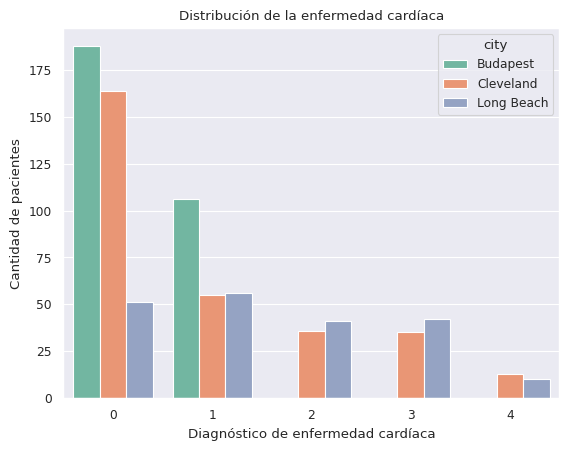

In [4]:
sns.countplot(data=df, x='diagnosis_heart_disease', hue='city')
plt.title('Distribución de la enfermedad cardíaca')
plt.xlabel('Diagnóstico de enfermedad cardíaca')
plt.ylabel('Cantidad de pacientes')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

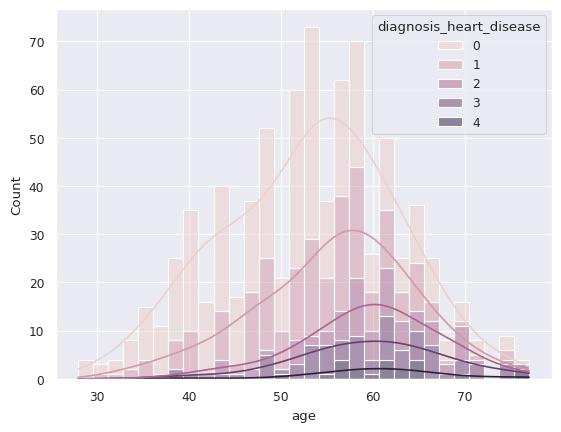

In [5]:
sns.histplot(data=df, x='age', hue='diagnosis_heart_disease', multiple='stack', bins=30, kde=True)

<Axes: xlabel='age', ylabel='Count'>

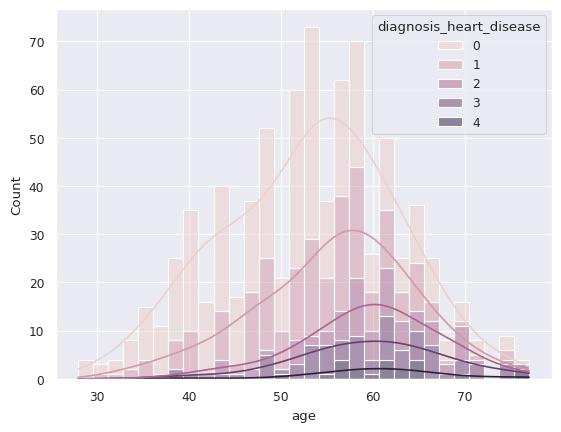

In [7]:
sns.histplot(data=df, x='age', hue='diagnosis_heart_disease', multiple='stack', bins=30, kde=True)

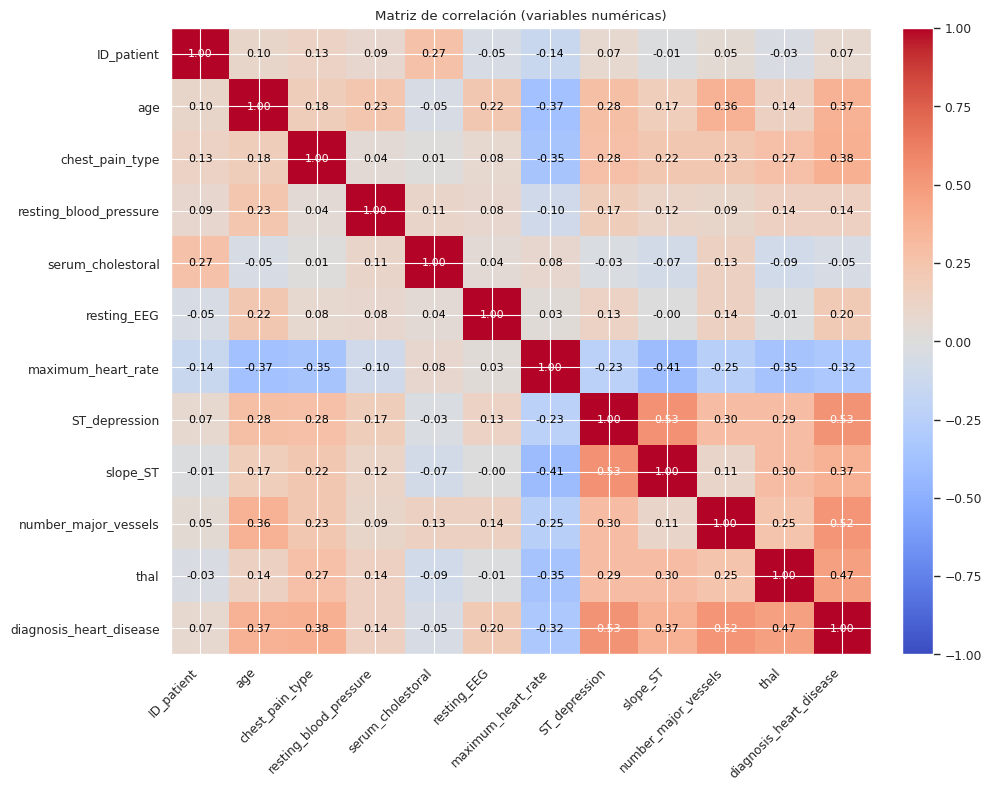

In [17]:
# Matriz de correlación (variables numéricas) y visualización con matplotlib
# Seleccionar sólo columnas numéricas para evitar intentar convertir cadenas a float
corr = df.select_dtypes(include=[np.number]).corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)
plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Anotar valores dentro de la matriz
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center',
            color='white' if abs(val) > 0.5 else 'black', fontsize=8)

plt.title("Matriz de correlación (variables numéricas)")
plt.tight_layout()
plt.show()

In [5]:
corr_matrix = df.corr()

# Plot
plt.matshow(corr_matrix)
plt.colorbar() # Adds a color legend
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

ValueError: could not convert string to float: 'atypical angina'

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Matriz de correlación (todas las variables)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'corr' is not defined

<Figure size 1200x1000 with 0 Axes>

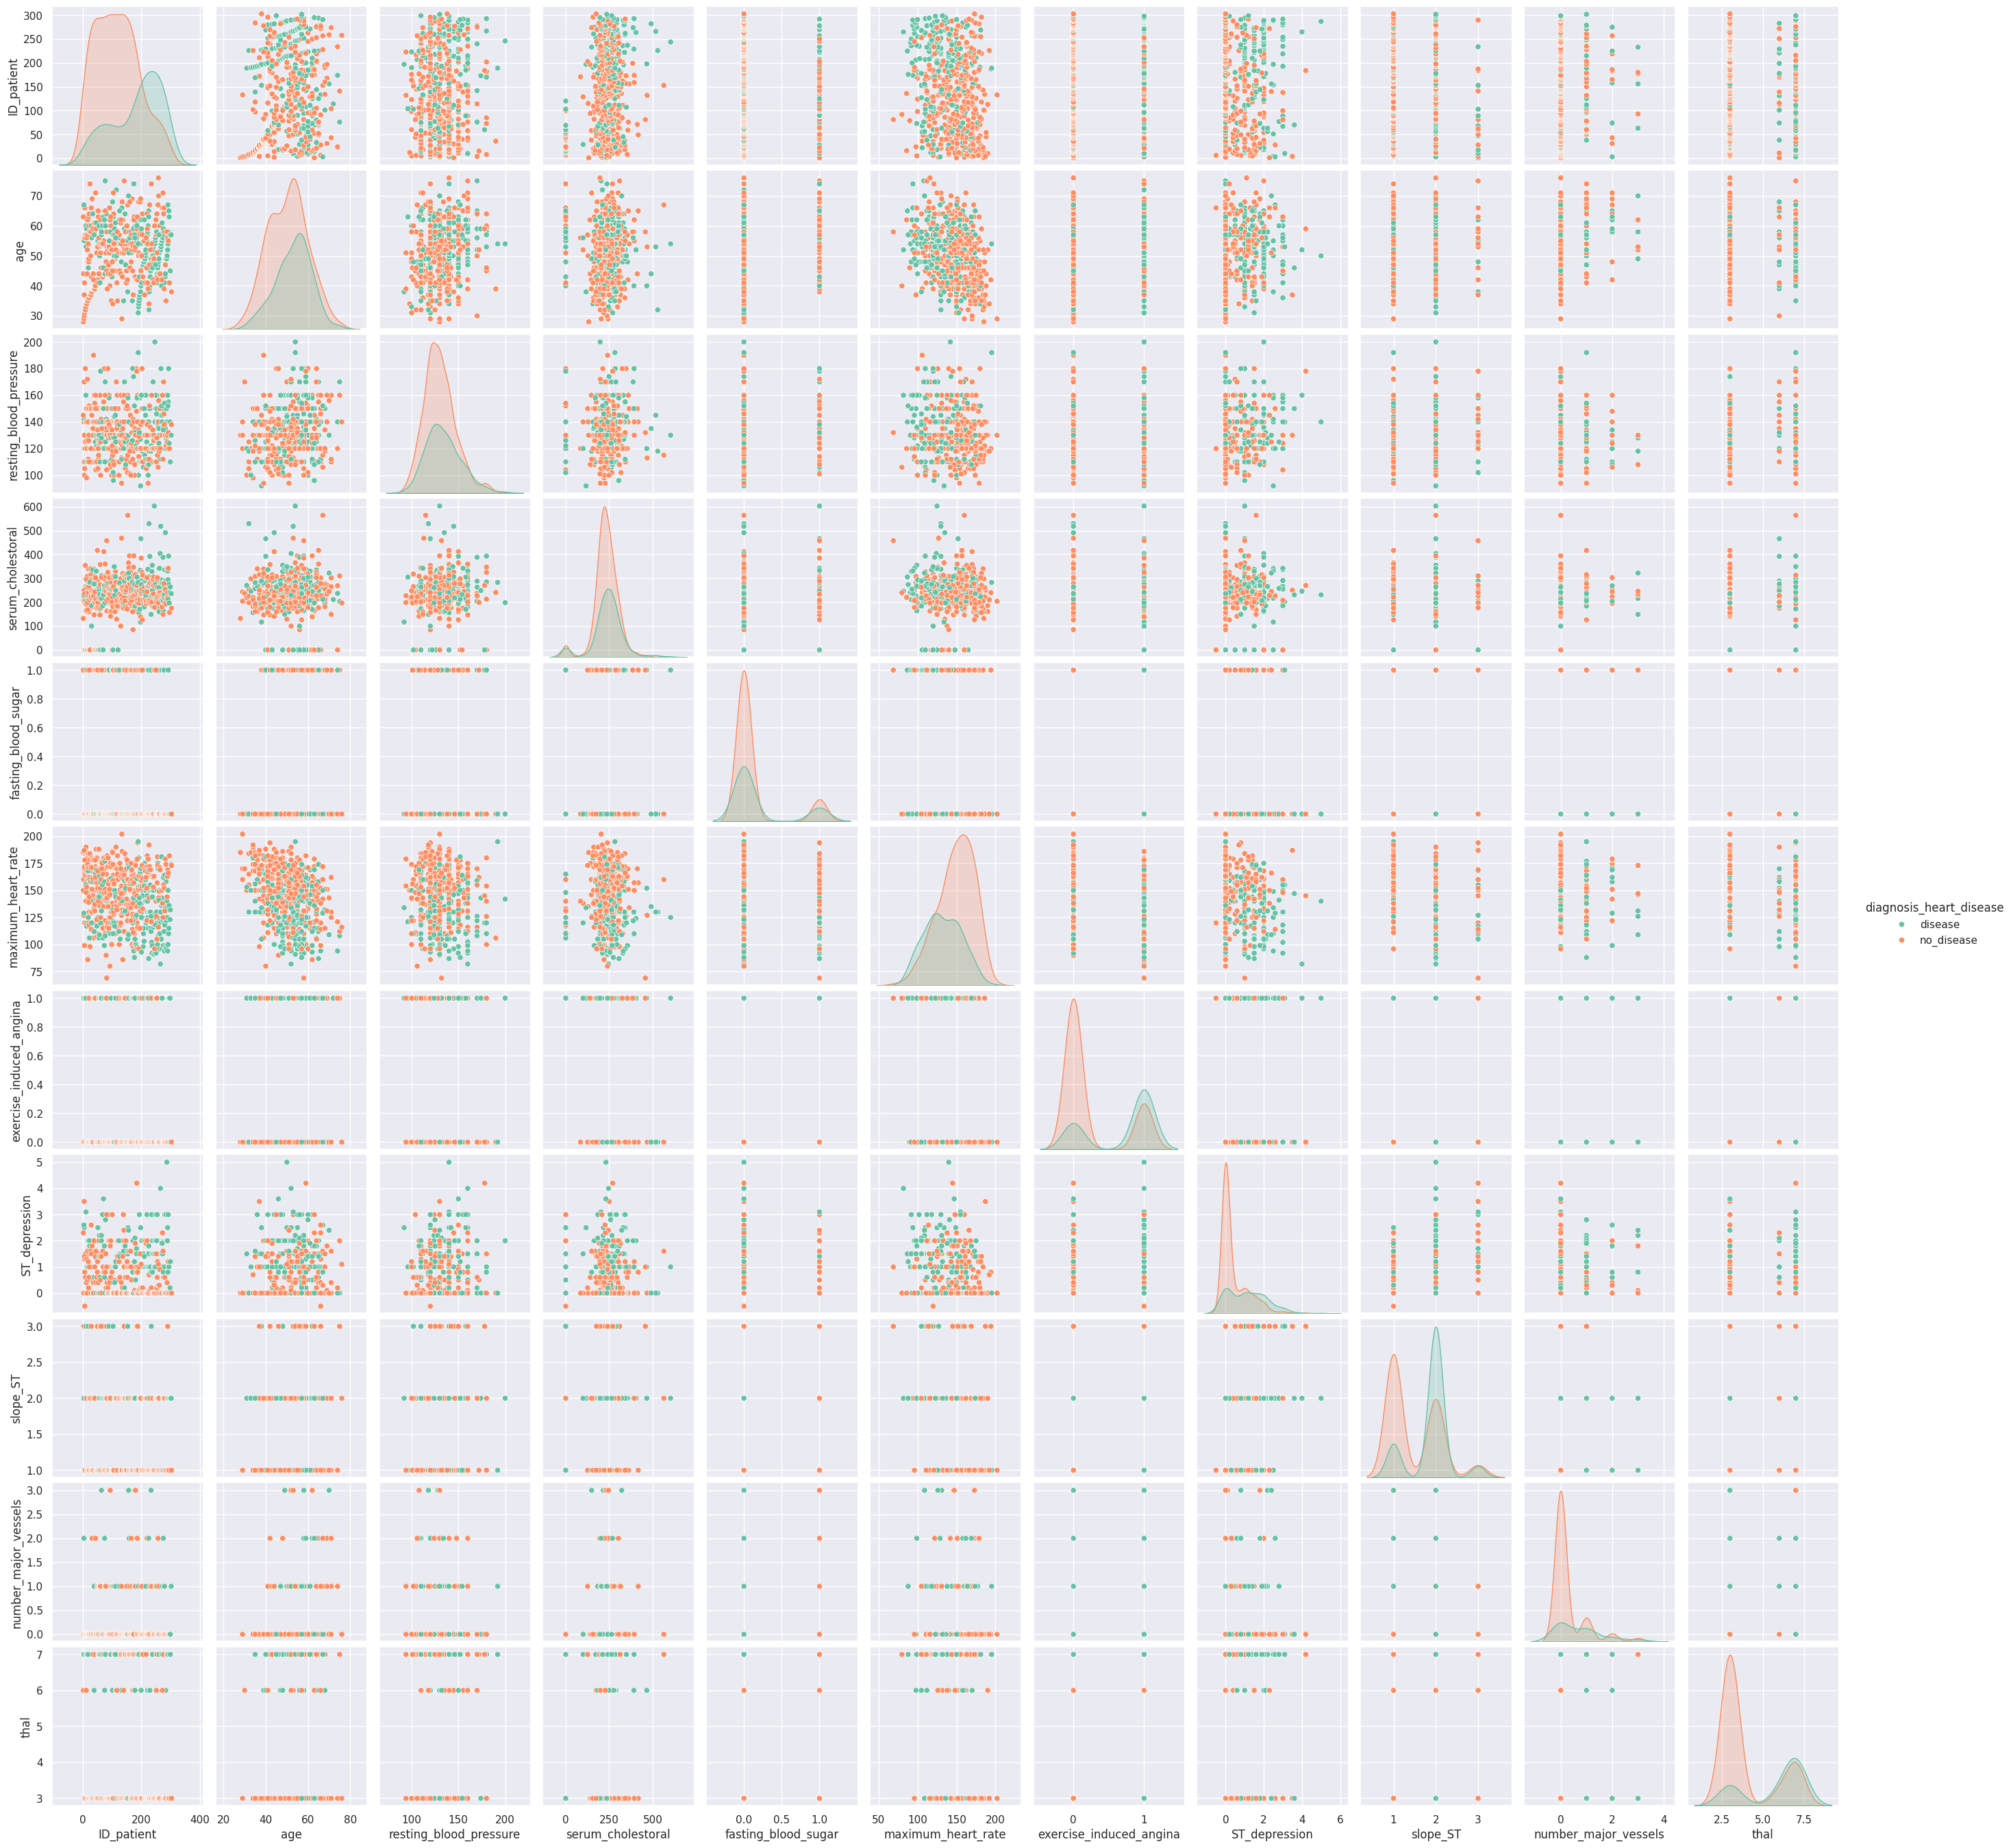

In [ ]:
sns.pairplot